# 3.2.1 Single slit

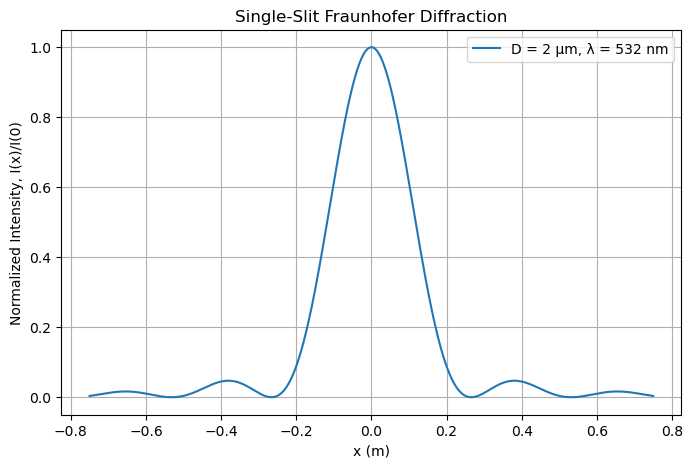

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# === 1. Define parameters ===
wavelength = 532e-9  # 532 nm in meters (green Nd:YAG laser)
D = 2e-6            # 2 micrometers slit width
y = 1.0             # 1 meter from slit to screen

# Define a range of x-values on the screen (e.g., ±1 cm)
x_min, x_max = -0.75, 0.75  # in meters
num_points = 1000
x_values = np.linspace(x_min, x_max, num_points)

# === 2. Compute beta and intensity ===
beta = (np.pi * D / wavelength) * (x_values / y)

# To avoid division by zero, handle beta=0 carefully
I_over_I0 = np.ones_like(beta)
non_zero = (beta != 0)
I_over_I0[non_zero] = (np.sin(beta[non_zero]) / beta[non_zero])**2

# === 3. Plot the results ===
plt.figure(figsize=(8,5))
plt.plot(x_values, I_over_I0, label='D = 2 μm, λ = 532 nm')
plt.xlabel('x (m)')
plt.ylabel('Normalized Intensity, I(x)/I(0)')
plt.title('Single-Slit Fraunhofer Diffraction')
plt.legend()
plt.grid(True)
plt.show()


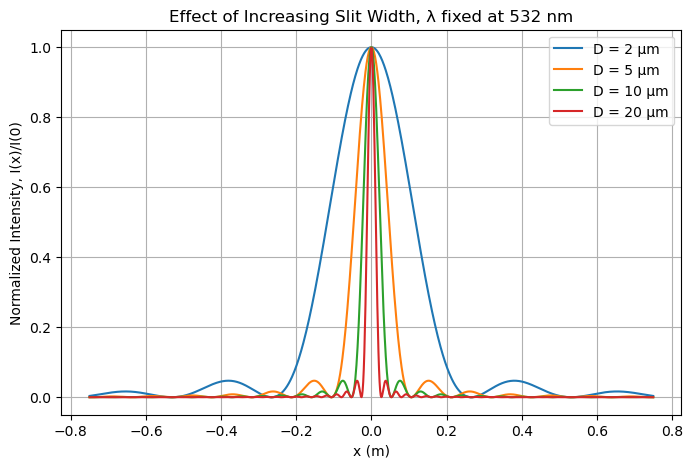

In [78]:
wavelength = 532e-9  # fixed
y = 1.0
D_values = [2e-6, 5e-6, 1e-5, 2e-5]  # example widths in meters

plt.figure(figsize=(8,5))

for D in D_values:
    beta = (np.pi * D / wavelength) * (x_values / y)
    I_over_I0 = np.ones_like(beta)
    non_zero = (beta != 0)
    I_over_I0[non_zero] = (np.sin(beta[non_zero]) / beta[non_zero])**2
    
    plt.plot(x_values, I_over_I0, label=f'D = {D*1e6:.0f} μm')

plt.xlabel('x (m)')
plt.ylabel('Normalized Intensity, I(x)/I(0)')
plt.title('Effect of Increasing Slit Width, λ fixed at 532 nm')
plt.legend()
plt.grid(True)
plt.show()


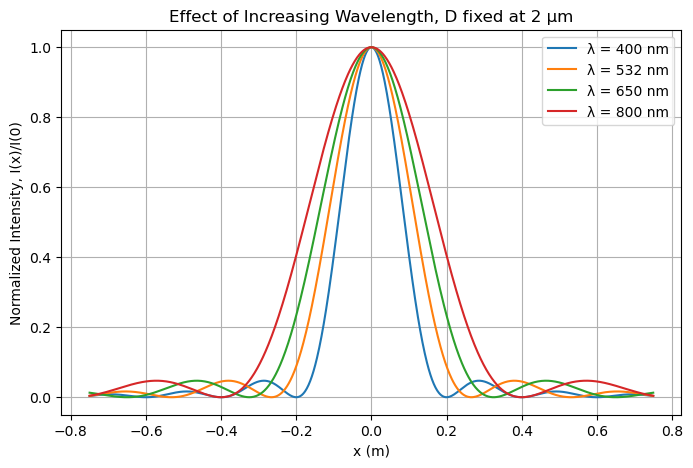

In [79]:
D = 2e-6  # fixed
y = 1.0
wavelengths = [400e-9, 532e-9, 650e-9, 800e-9]  # in meters

plt.figure(figsize=(8,5))

for wl in wavelengths:
    beta = (np.pi * D / wl) * (x_values / y)
    I_over_I0 = np.ones_like(beta)
    non_zero = (beta != 0)
    I_over_I0[non_zero] = (np.sin(beta[non_zero]) / beta[non_zero])**2
    
    plt.plot(x_values, I_over_I0, label=f'λ = {wl*1e9:.0f} nm')

plt.xlabel('x (m)')
plt.ylabel('Normalized Intensity, I(x)/I(0)')
plt.title('Effect of Increasing Wavelength, D fixed at 2 μm')
plt.legend()
plt.grid(True)
plt.show()


<hr>

# 3.2.2  Double slit (Young’s experiment)

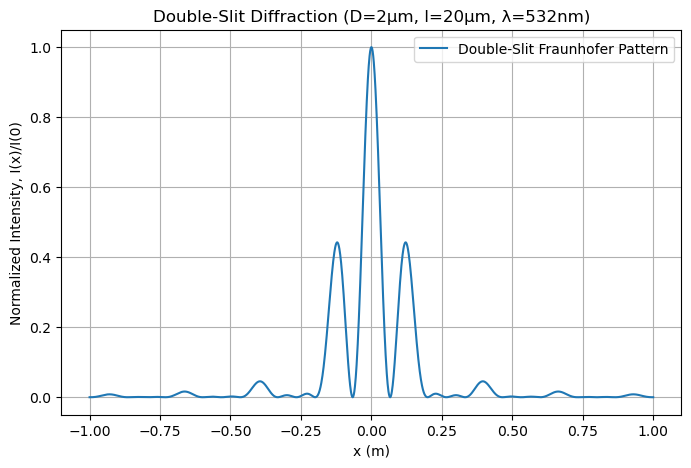

In [80]:
# --- 1. Define parameters ---
lambda_ = 532e-9   # 532 nm in meters
D = 2e-6           # slit width = 2 micrometers
l = 4e-6          # slit separation = 4 micrometers
y = 1.0            # distance to screen = 1 meter

# Define x-range on the screen (e.g., ±10 mm)
x_min, x_max = -1, 1  # in meters
num_points = 2000
x = np.linspace(x_min, x_max, num_points)

# --- 2. Calculate beta, gamma, and I(x)/I(0) ---
beta = (np.pi * D / lambda_) * (x / y)
gamma = (np.pi * l / lambda_) * (x / y)

# Handle the "beta = 0" case to avoid 0/0
# (though numpy handles sin(0)/0 ~ 1 if done carefully)
# We'll do it explicitly:
I_single_slit = np.ones_like(beta)
nonzero_beta = (beta != 0)
I_single_slit[nonzero_beta] = (np.sin(beta[nonzero_beta]) / beta[nonzero_beta])**2

# Double-slit interference factor
I_interference = np.cos(gamma)**2

# Total normalized intensity
I_norm = I_single_slit * I_interference

# --- 3. Plot the diffraction pattern ---
plt.figure(figsize=(8,5))
plt.plot(x, I_norm, label='Double-Slit Fraunhofer Pattern')
plt.xlabel('x (m)')
plt.ylabel('Normalized Intensity, I(x)/I(0)')
plt.title('Double-Slit Diffraction (D=2µm, l=20µm, λ=532nm)')
plt.grid(True)
plt.legend()
plt.show()


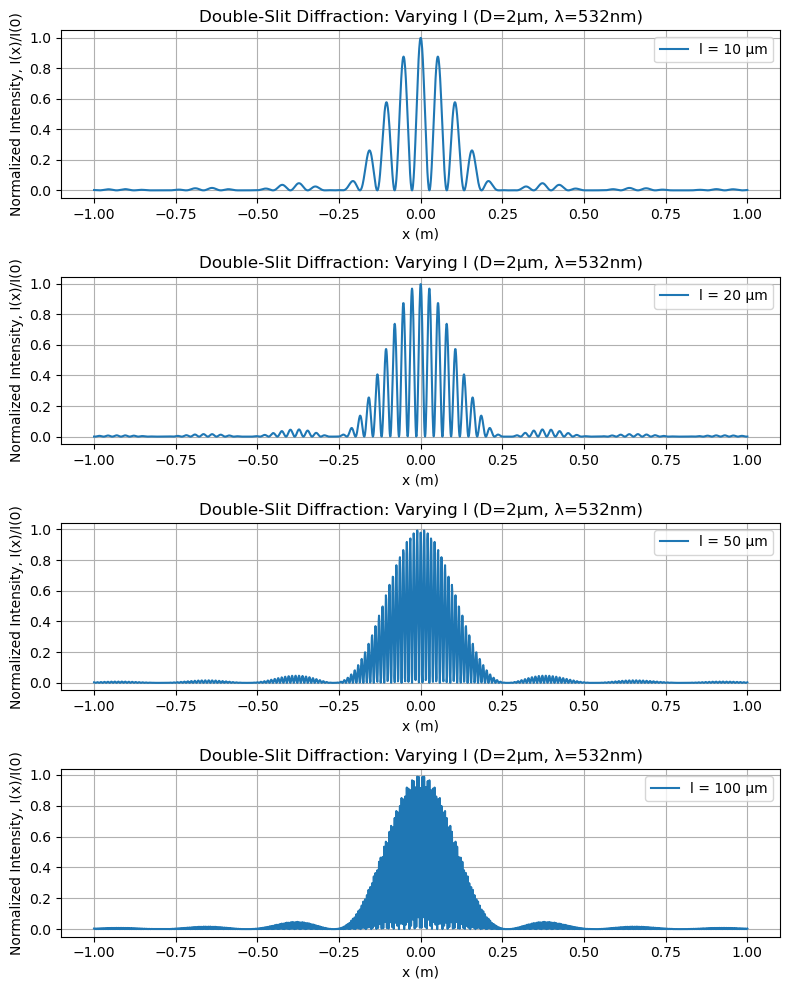

In [81]:
lambda_ = 532e-9
l_values = [10e-6, 20e-6, 50e-6, 100e-6]  # in meters

fig, axs = plt.subplots(4, 1, figsize=(8, 10))

for i, l in enumerate(l_values):
    beta = (np.pi * D / lambda_) * (x / y)
    gamma = (np.pi * l / lambda_) * (x / y)
    
    I_single_slit = np.ones_like(beta)
    nonzero_beta = (beta != 0)
    I_single_slit[nonzero_beta] = (np.sin(beta[nonzero_beta]) / beta[nonzero_beta])**2
    
    I_interference = np.cos(gamma)**2
    I_norm = I_single_slit * I_interference
    
    axs[i].plot(x, I_norm, label=f'l = {l*1e6:.0f} µm')
    axs[i].set_xlabel('x (m)')
    axs[i].set_ylabel('Normalized Intensity, I(x)/I(0)')
    axs[i].set_title('Double-Slit Diffraction: Varying l (D=2µm, λ=532nm)')
    axs[i].legend()
    axs[i].grid(True)
fig.tight_layout()
plt.show()


<hr>

# 3.2.3 Diffraction grating


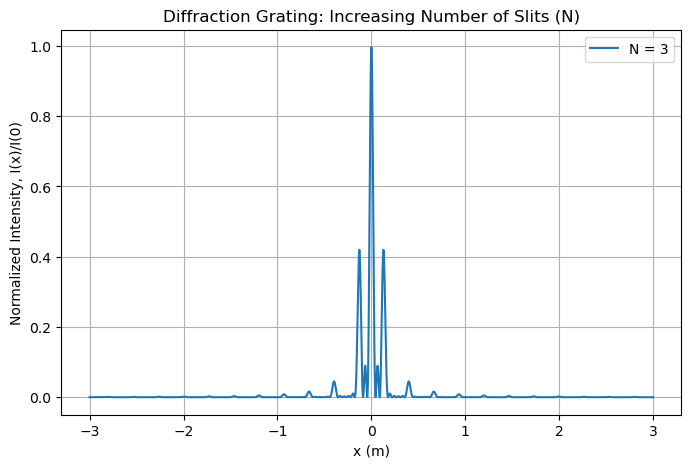

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define parameters (adjust as needed) ---
lambda_ = 532e-9   # 532 nm (green Nd:YAG)
D = 2e-6           # Slit width = 2 micrometers
l = 4e-6           # Slit separation = 4 micrometers
y = 1.0            # Distance to screen = 1 meter


# Function to compute normalized intensity for given N
def diffraction_grating_intensity(x, N, D, l, lambda_, y):
    # Fraunhofer parameters
    beta = (np.pi * D / lambda_) * (x / y)
    gamma = (np.pi * l / lambda_) * (x / y)
    
    # Single-slit envelope: (sin beta / beta)^2
    I_envelope = np.ones_like(beta)
    nonzero_beta = (beta != 0)
    I_envelope[nonzero_beta] = (np.sin(beta[nonzero_beta]) / beta[nonzero_beta])**2
    
    # Grating interference factor: (sin(N gamma) / [N sin(gamma)])^2
    # To avoid division by zero at gamma=0, handle carefully:
    I_grating = np.ones_like(gamma)
    nonzero_gamma = (gamma != 0)
    numerator = np.sin(N * gamma[nonzero_gamma])
    denominator = N * np.sin(gamma[nonzero_gamma])
    I_grating[nonzero_gamma] = (numerator / denominator)**2
    
    # Total normalized intensity
    return I_envelope * I_grating

# --- 2. Loop over different N values and plot ---
plt.figure(figsize=(8,5))

# Define x-range on the screen (e.g., ±10 mm)
x_min, x_max = -3, 3  # in meters
num_points = 2000
x = np.linspace(x_min, x_max, num_points)

N = 3
I_norm = diffraction_grating_intensity(x, N, D, l, lambda_, y)
plt.plot(x, I_norm, label=f'N = {N}')

plt.xlabel('x (m)')
plt.ylabel('Normalized Intensity, I(x)/I(0)')
plt.title('Diffraction Grating: Increasing Number of Slits (N)')
plt.legend()
plt.grid(True)
plt.show()


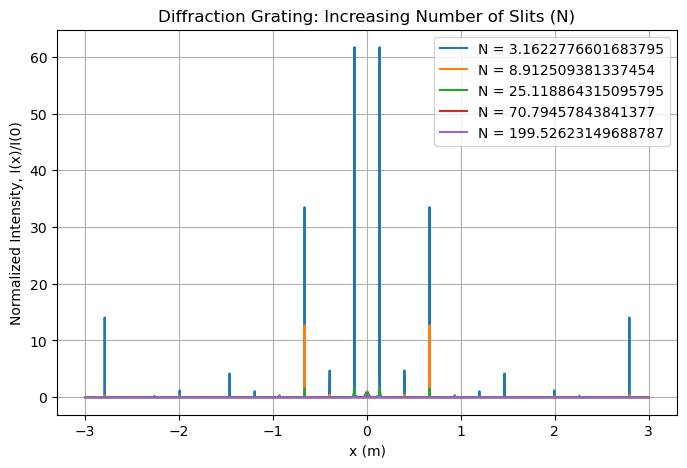

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define parameters (adjust as needed) ---
lambda_ = 532e-9   # 532 nm (green Nd:YAG)
D = 2e-6           # Slit width = 2 micrometers
l = 4e-6           # Slit separation = 4 micrometers
y = 1.0            # Distance to screen = 1 meter


# --- 2. Loop over different N values and plot ---
N_values = np.logspace(0.5, 2.3, 5)  # example: from 1 slit up to 20 slits
plt.figure(figsize=(8,5))

for N in N_values:
    I_norm = diffraction_grating_intensity(x, N, D, l, lambda_, y)
    plt.plot(x, I_norm, label=f'N = {N}')

plt.xlabel('x (m)')
plt.ylabel('Normalized Intensity, I(x)/I(0)')
plt.title('Diffraction Grating: Increasing Number of Slits (N)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y = 0.87  # 87 cm
x = 3e-3  # 3 mm
lambda_ = 532e-9  # 532 nm
omega = lambda x: y * lambda_ / (x)

print(f'omega = {omega(x)*1e3}mm')

omega = 0.15428000000000003mm


In [ ]:
R = 0.817  
dx = 4e-3 


print(R * lambda_ / dx*1e3)

0.10866100000000001
1.0859999999999999


In [12]:
R = 7.5e-2
dx = 2e-3
print(1.22*R*lambda_ / dx*1e3)

0.024339


In [13]:
R = 20e-2
dx = 2.5e-3
print(1.22*R*lambda_ / dx*1e3)

0.0519232


In [20]:
R = 2.493
dx = 6e-3
print(1.22*R*lambda_ / dx*1e3)

0.26967612
